In [88]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [130]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data =[[0],[0],[0],[1],[1],[1]]

In [131]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [132]:
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [133]:
H = tf.sigmoid(tf.matmul(X, W) + b)

In [234]:
cost = -tf.reduce_mean(Y*tf.log(H)+(1-Y)*(tf.log(1-H)))

In [250]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.002)

In [251]:
train = optimizer.minimize(cost)

In [253]:
sess = tf.Session()

In [254]:
sess.run(tf.global_variables_initializer())

In [255]:
steps = []
costs = []

for step in range(50001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 3000 == 0:
        print (step, "Cost: {:.2f}".format(cost_val))
        costs.append(cost_val)
        steps.append(step)

0 Cost: 2.35
3000 Cost: 0.32
6000 Cost: 0.29
9000 Cost: 0.27
12000 Cost: 0.25
15000 Cost: 0.23
18000 Cost: 0.22
21000 Cost: 0.21
24000 Cost: 0.19
27000 Cost: 0.18
30000 Cost: 0.17
33000 Cost: 0.16
36000 Cost: 0.16
39000 Cost: 0.15
42000 Cost: 0.14
45000 Cost: 0.14
48000 Cost: 0.13

Hypothesis :  [[0.02239802]
 [0.14572185]
 [0.26202428]
 [0.8016957 ]
 [0.9516471 ]
 [0.9842893 ]] 
Correct(Y) :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy :  1.0


In [258]:
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [259]:
# Accuracy report
hypo_val, predict_val, acc_val = sess.run([H, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
print("\nHypothesis : ", hypo_val, "\nCorrect(Y) : ", predict_val, "\nAccuracy : ", acc_val)


Hypothesis :  [[0.02239802]
 [0.14572185]
 [0.26202428]
 [0.8016957 ]
 [0.9516471 ]
 [0.9842893 ]] 
Correct(Y) :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy :  1.0


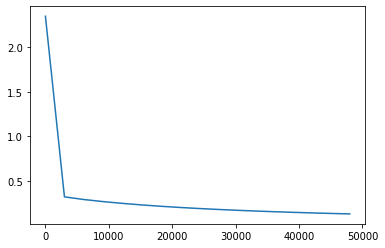

In [260]:
plt.plot(steps, costs)